In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [247]:
penguins = pd.read_csv('C:/Users/HP/Desktop/Classification_Regression_Methods/noisy_datasets/noisy_datasets/penguins.csv')

dataset2 = pd.read_csv('C:/Users/HP/Desktop/Classification_Regression_Methods/noisy_datasets/noisy_datasets/emissions_by_country.csv')
dataset3 = pd.read_csv('C:/Users/HP/Desktop/Classification_Regression_Methods/noisy_datasets/noisy_datasets/diamond.csv')



In [248]:
print(penguins.describe())

       calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         

In [249]:
penguins.shape

(344, 10)

In [250]:
print(penguins.isnull().sum())

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64


In [251]:
numeric_cols = penguins.select_dtypes(include=[np.number]).columns
categorical_cols = penguins.select_dtypes(exclude=[np.number]).columns


In [252]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        if not np.isnan(row1[i]) and not np.isnan(row2[i]):
            distance += (row1[i] - row2[i]) ** 2
    return np.sqrt(distance)

def knn_impute_numeric(data, k=5):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if np.isnan(data[i, j]):
                distances = []
                for r in range(data.shape[0]):
                    if r != i and not np.isnan(data[r, j]):
                        distances.append((euclidean_distance(data[i], data[r]), data[r, j]))

                distances.sort(key=lambda x: x[0])
                neighbors = [dist[1] for dist in distances[:k]]
        
                data[i, j] = np.mean(neighbors)
    
    return data
    
penguin_numeric_values = penguins[numeric_cols].values  
penguin_numeric_imputed = knn_impute_numeric(penguin_numeric_values, k=5)

penguins[numeric_cols] = pd.DataFrame(penguin_numeric_imputed, columns=numeric_cols)

for col in categorical_cols:
    penguins[col] = penguins[col].fillna(penguins[col].mode()[0])
print(penguins.isnull().sum())




species                   0
island                    0
calorie requirement       0
average sleep duration    0
bill_length_mm            0
bill_depth_mm             0
flipper_length_mm         0
body_mass_g               0
gender                    0
year                      0
dtype: int64


In [253]:
penguins.shape

(344, 10)

In [254]:
penguins['species'] = penguins['species'].str.capitalize()


In [255]:
penguins['species'] = penguins['species'].astype('category')
penguins['island']=penguins['island'].apply(lambda x: 1 if x=='torgersen' else 0)

In [256]:
penguins.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,0,6563.0,11.0,39.100,18.70,181.0,3750.0,male,2007.0
1,Adelie,0,4890.0,14.0,39.500,17.40,186.0,3800.0,female,2007.0
2,Adelie,0,7184.0,11.0,40.300,18.00,195.0,3250.0,female,2007.0
3,Adelie,0,4169.0,8.0,59.258,17.18,191.6,992.0,male,2007.0
4,Adelie,0,4774.0,8.0,36.700,19.30,193.0,3450.0,female,2007.0


In [257]:
penguins_clean = penguins[(penguins['flipper_length_mm'] >= 180) & (penguins['flipper_length_mm'] <= 210)]
flipper_mean = penguins['flipper_length_mm'].mean()
penguins.loc[(penguins['flipper_length_mm'] < 180) | (penguins['flipper_length_mm'] > 210), 'flipper_length_mm'] = flipper_mean


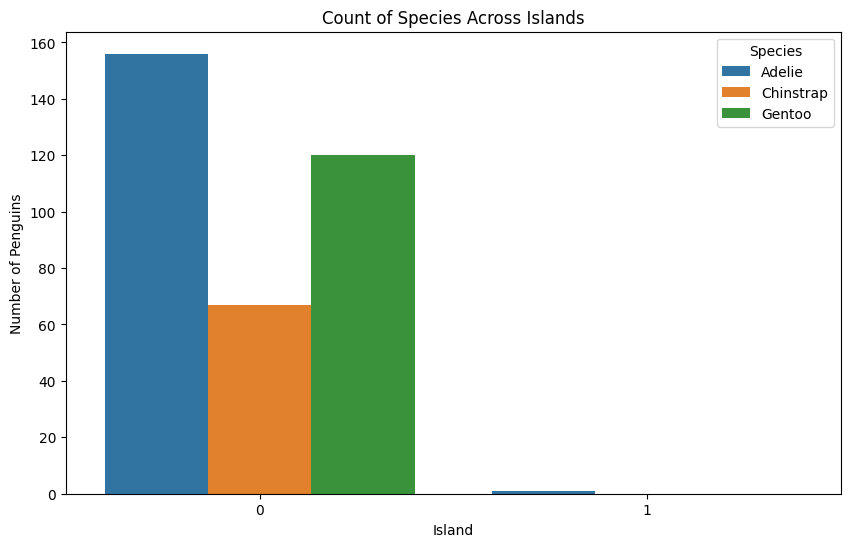

In [258]:
# Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=penguins, x='island', hue='species')
plt.title('Count of Species Across Islands')
plt.ylabel('Number of Penguins')
plt.xlabel('Island')
plt.legend(title='Species')
plt.show()


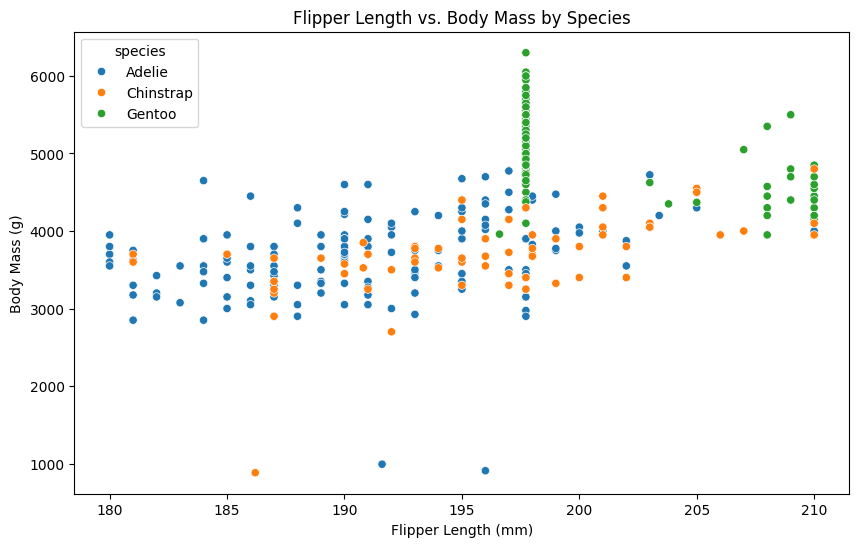

In [259]:
#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Flipper Length vs. Body Mass by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()


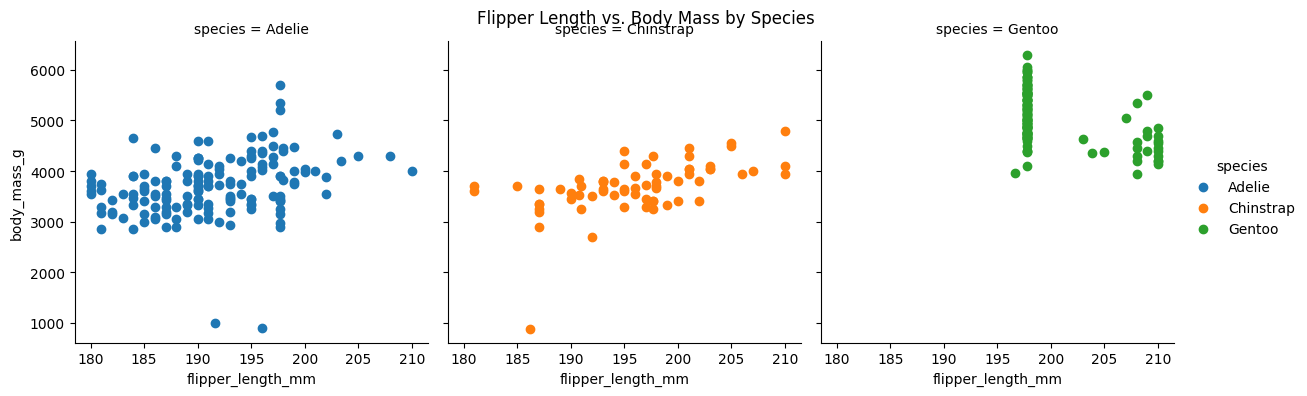

In [260]:
#Facet Grid
g = sns.FacetGrid(penguins, col='species', hue='species', height=4)
g.map(plt.scatter, 'flipper_length_mm', 'body_mass_g')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Flipper Length vs. Body Mass by Species')
plt.show()


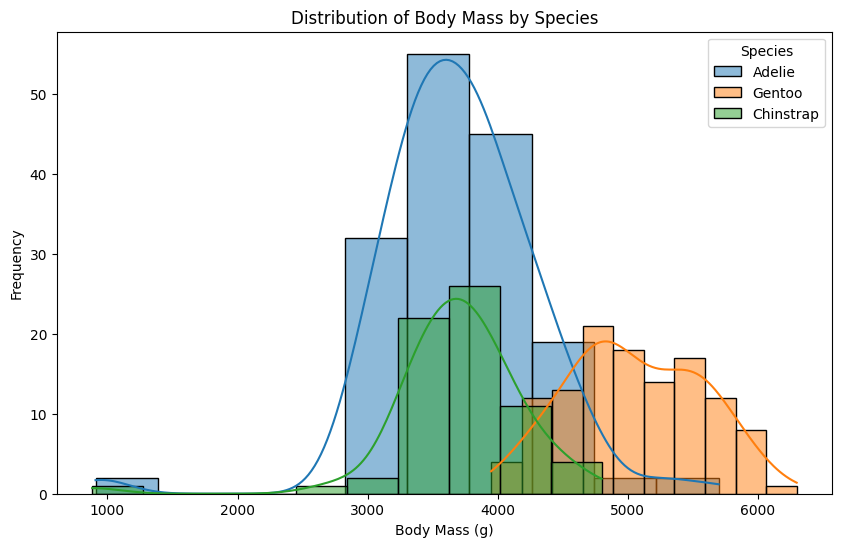

In [261]:
#Histogram
plt.figure(figsize=(10, 6))
for species in penguins['species'].unique():
    subset = penguins[penguins['species'] == species]
    sns.histplot(subset['body_mass_g'], kde=True, label=species, bins=10)
plt.title('Distribution of Body Mass by Species')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.show()


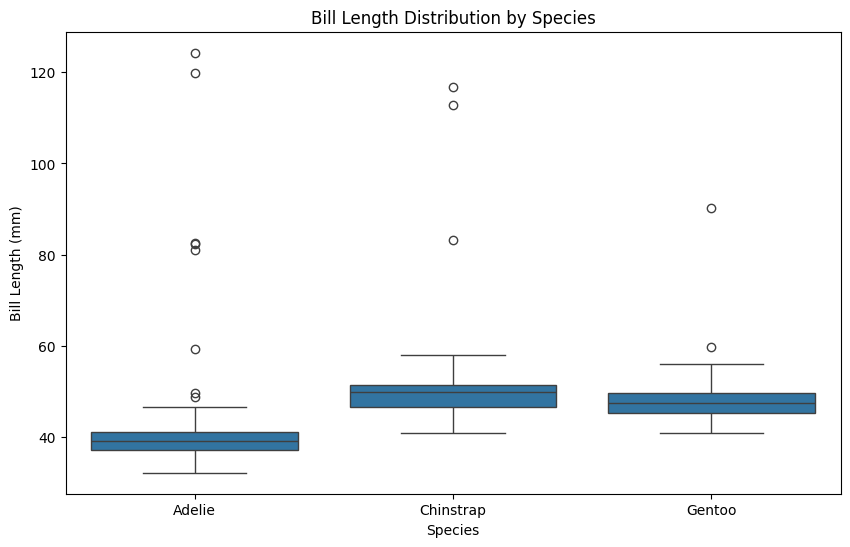

In [262]:
#BoxPlot
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguins, x='species', y='bill_length_mm')
plt.title('Bill Length Distribution by Species')
plt.ylabel('Bill Length (mm)')
plt.xlabel('Species')
plt.show()


In [263]:
# Convert categorical columns to numerical using pandas' get_dummies or similar methods
penguins_numeric = pd.get_dummies(penguins, drop_first=True)

# Calculate the correlation matrix of the numeric dataframe
correlation_matrix = penguins_numeric.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Display the first 5 rows of the numeric DataFrame to inspect
penguins_numeric.head()


Correlation Matrix:
                           island  calorie requirement  average sleep duration  \
island                  1.000000            -0.066582                0.037045   
calorie requirement    -0.066582             1.000000               -0.055628   
average sleep duration  0.037045            -0.055628                1.000000   
bill_length_mm          0.374493            -0.001948                0.017318   
bill_depth_mm          -0.004662            -0.057725                0.009026   
flipper_length_mm       0.006452            -0.095687                0.099172   
body_mass_g            -0.009782             0.040179                0.054418   
year                   -0.002431            -0.021767                0.038780   
species_Chinstrap      -0.026555            -0.085093               -0.035668   
species_Gentoo         -0.039520             0.022550                0.035797   
gender_MALE            -0.002915            -0.071797                0.060909   
gender_

,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,gender_MALE,gender_female,gender_male
0,0,6563.0,11.0,39.100,18.70,181.0,3750.0,2007.0,False,False,False,False,True
1,0,4890.0,14.0,39.500,17.40,186.0,3800.0,2007.0,False,False,False,True,False
2,0,7184.0,11.0,40.300,18.00,195.0,3250.0,2007.0,False,False,False,True,False
3,0,4169.0,8.0,59.258,17.18,191.6,992.0,2007.0,False,False,False,False,True
4,0,4774.0,8.0,36.700,19.30,193.0,3450.0,2007.0,False,False,False,True,False


In [264]:
print(dataset3)

      Unnamed: 0 carat        cut color clarity  average us salary  \
0              1  0.23      Ideal     E     SI2              31282   
1              2  0.21    Premium     E     SI1              40049   
2              3  0.23       Good     E     VS1              33517   
3              4  0.29    Premium     I     VS2              38495   
4              5  0.31       Good     J     SI2              34178   
...          ...   ...        ...   ...     ...                ...   
53935      53936  0.72      Ideal     D     SI1              43892   
53936      53937  0.72       Good     D     SI1              35532   
53937      53938   0.7  Very Good     D     SI1              32133   
53938      53939  0.86    Premium     H     SI2              44248   
53939      53940  0.75      Ideal     D     SI2              41412   

       number of diamonds mined (millions) depth table price     x     y     z  
0                                     5.01  61.5    55   326  3.95  3.98  2.43

In [265]:
dataset3.shape

(53940, 13)

In [266]:
print(dataset3.isnull().sum())

Unnamed: 0                              377
carat                                  1510
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                   694
table                                  1542
price                                  1583
x                                      1526
y                                      1221
z                                      1433
dtype: int64


In [267]:
dataset3_cleaned = dataset3.dropna()
print(dataset3_cleaned.isnull().sum())


Unnamed: 0                             0
carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64


In [268]:
if 'Coal' in dataset3.columns:
    dataset3['Coal'].fillna(dataset3['Coal'].mean(), inplace=True)

if 'Year' in dataset3.columns:
    dataset3['Year'].fillna(dataset3['Year'].mean(), inplace=True)

if 'Temperature' in dataset3.columns:
    dataset3['Temperature'].fillna(dataset3['Temperature'].mean(), inplace=True)

if 'Oil' in dataset3.columns:
    dataset3['Oil'].fillna(dataset3['Oil'].mean(), inplace=True)

if 'Gas' in dataset3.columns:
    dataset3['Gas'].fillna(dataset3['Gas'].mode()[0], inplace=True)


In [269]:
if 'Country' in dataset3.columns:
    dataset3['Country'] = dataset3['Country'].str.capitalize()


In [270]:
if 'Temperature' in dataset3.columns:
    dataset3['Temperature'] = dataset3['Temperature'].astype(float)

    # Assuming temperature_mean is defined somewhere
    temperature_mean = dataset3['Temperature'].mean()  # Calculate the mean first if not already done
    dataset3.loc[(dataset3['Temperature'] < 60) | (dataset3['Temperature'] > 70), 'Temperature'] = temperature_mean
else:
    print("Column 'Temperature' does not exist in the DataFrame.")


Column 'Temperature' does not exist in the DataFrame.


In [271]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP Per Capita (USD)', y='Total', data=dataset3, alpha=0.6)
plt.title('GDP Per Capita vs. Total Emissions')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Total Emissions')
plt.show()


ValueError: Could not interpret value `GDP Per Capita (USD)` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [272]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset3.iloc[:, 4:10].corr()  # Adjust index range for features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Emission Sources')
plt.show()


ValueError: could not convert string to float: 'SI2'

<Figure size 1000x800 with 0 Axes>

In [273]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total', data=dataset3, marker='o')
plt.title('Yearly Trends in Total Emissions')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.show()


ValueError: Could not interpret value `Year` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [274]:
import matplotlib.pyplot as plt

# Group the data by year and sum the total emissions
total_emissions_by_year = dataset3.groupby('Year')['Total'].sum()

plt.figure(figsize=(12, 6))
total_emissions_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


KeyError: 'Year'

In [275]:
plt.figure(figsize=(12, 6))
plt.scatter(dataset3['GDP Per Capita (USD)'], dataset3['Total'], alpha=0.5, color='orange')
plt.title('GDP Per Capita vs. Total Emissions')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Total Emissions')
plt.grid()
plt.show()


KeyError: 'GDP Per Capita (USD)'

<Figure size 1200x600 with 0 Axes>

In [276]:
emission_threshold = dataset3['Total'].median()  # You can adjust this threshold as needed
dataset3['is_high_emission'] = (dataset3['Total'] > emission_threshold).astype(int)

# Select numeric columns for correlation analysis
numeric_cols = dataset3.select_dtypes(include=[np.number]).columns.tolist()

# Compute the correlation matrix for numeric columns
correlation_matrix = dataset3[numeric_cols].corr()

# Print the correlation with the target variable 'is_high_emission'
print(correlation_matrix['is_high_emission'])

# Identify features with low correlation (< 0.1 or another threshold)
low_correlation_features = correlation_matrix[correlation_matrix['is_high_emission'].abs() < 0.1].index.tolist()

# Check if 'is_high_emission' is in the list before removing
if 'is_high_emission' in low_correlation_features:
    low_correlation_features.remove('is_high_emission')  # We don't want to remove the target variable

print("Uncorrelated Features:", low_correlation_features)

# Drop uncorrelated features from the dataset
dataset3_reduced = dataset3.drop(columns=low_correlation_features)

# Output the reduced dataset to confirm
print(dataset3_reduced.head())

KeyError: 'Total'

In [277]:
# One-hot encoding for 'Country' column manually
country_unique = dataset3['Country'].unique()  # Get unique values in the 'Country' column
for country in country_unique:
    dataset3[country] = dataset3['Country'].apply(lambda x: 1 if x == country else 0)

# Optional: Drop the original 'Country' column if no longer needed
dataset3 = dataset3.drop(columns=['Country'])

# Output the modified dataset to confirm the changes
print(dataset3.head())


KeyError: 'Country'

In [278]:
# Normalizing 'Coal' column manually
min_value_1 = dataset3['Coal'].min()
max_value_1 = dataset3['Coal'].max()
dataset3['Coal'] = (dataset3['Coal'] - min_value_1) / (max_value_1 - min_value_1)

# Normalizing 'Oil' column manually
min_value_2 = dataset3['Oil'].min()
max_value_2 = dataset3['Oil'].max()
dataset3['Oil'] = (dataset3['Oil'] - min_value_2) / (max_value_2 - min_value_2)

# Normalizing 'Gas' column manually
min_value_3 = dataset3['Gas'].min()
max_value_3 = dataset3['Gas'].max()
dataset3['Gas'] = (dataset3['Gas'] - min_value_3) / (max_value_3 - min_value_3)

# Normalizing 'Cement' column manually
min_value_4 = dataset3['Cement'].min()
max_value_4 = dataset3['Cement'].max()
dataset3['Cement'] = (dataset3['Cement'] - min_value_4) / (max_value_4 - min_value_4)

# Normalizing 'Flaring' column manually
min_value_5 = dataset3['Flaring'].min()
max_value_5 = dataset3['Flaring'].max()
dataset3['Flaring'] = (dataset3['Flaring'] - min_value_5) / (max_value_5 - min_value_5)

# Normalizing 'Other' column manually
min_value_6 = dataset3['Other'].min()
max_value_6 = dataset3['Other'].max()
dataset3['Other'] = (dataset3['Other'] - min_value_6) / (max_value_6 - min_value_6)

# Output the modified dataset to confirm the changes
print(dataset3.head())


KeyError: 'Coal'

In [279]:
import pickle

In [280]:
penguins['gender'] = penguins['gender'].apply(lambda x: 1 if x == 'male' else 0)
penguins['island'] = penguins['island'].apply(lambda x: 1 if x == 'torgersen' else 0)
penguins['species']= penguins['species'].astype('category').cat.codes 

In [281]:
# Assuming 'penguins' is your preprocessed DataFrame
X = penguins.drop(columns=['gender']).values  # Replace 'is_male' with the appropriate target column if needed
Y = penguins['gender'].values.reshape(-1, 1)  # Ensure Y is a column vector

# Split into training (80%) and test (20%) datasets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = Y[:split_index], Y[split_index:]

# Print shapes
#print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
#print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')


X_train shape: (275, 9), y_train shape: (275, 1)
X_test shape: (69, 9), y_test shape: (69, 1)


In [282]:
class LogitRegression:
    def __init__(self, learning_rate=0.001, iterations=100000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []

    def sigmoid(self, z):
        # Sigmoid function
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):
        # Loss function
        m = len(y)
        return -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    def gradient_descent(self, X, y):
        m, n = X.shape
        # Initialize weights and bias
        self.weights = np.random.uniform(0, 1, (n, 1))
        self.bias = 0

        # Gradient Descent Loop
        for i in range(self.iterations):
            # Linear model
            z = np.dot(X, self.weights) + self.bias
            # Prediction using sigmoid
            y_hat = self.sigmoid(z)
            # Calculate gradients
            dw = (1/m) * np.dot(X.T, (y_hat - y))
            db = (1/m) * np.sum(y_hat - y)
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            # Compute and store the loss
            self.loss.append(self.cost(y_hat, y))
            if i % 1000 == 0:
                print(f'Iteration : {i}')

    def fit(self, X, y):
        self.gradient_descent(X, y)

    def predict(self, X):
        # Predict binary outcomes
        z = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(z)
        return (y_hat >= 0.5).astype(int)


In [283]:
# Initialize and train the model


# Save the best model weights as a pickle file
#with open('best_model_weights.pickle', 'wb') as f:
#    pickle.dump({'weights': model.weights, 'bias': model.bias}, f)
    


C:\Users\HP\AppData\Local\Temp\ipykernel_36576\2190984721.py:14: RuntimeWarning: divide by zero encountered in log
  return -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\HP\AppData\Local\Temp\ipykernel_36576\2190984721.py:14: RuntimeWarning: invalid value encountered in multiply
  return -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\HP\AppData\Local\Temp\ipykernel_36576\2190984721.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration : 0
Iteration : 1000
Iteration : 2000
Iteration : 3000
Iteration : 4000
Iteration : 5000
Iteration : 6000
Iteration : 7000
Iteration : 8000
Iteration : 9000
Iteration : 10000
Iteration : 11000
Iteration : 12000
Iteration : 13000
Iteration : 14000
Iteration : 15000
Iteration : 16000
Iteration : 17000
Iteration : 18000
Iteration : 19000
Iteration : 20000
Iteration : 21000
Iteration : 22000
Iteration : 23000
Iteration : 24000
Iteration : 25000
Iteration : 26000
Iteration : 27000
Iteration : 28000
Iteration : 29000
Iteration : 30000
Iteration : 31000
Iteration : 32000
Iteration : 33000
Iteration : 34000
Iteration : 35000
Iteration : 36000
Iteration : 37000
Iteration : 38000
Iteration : 39000
Iteration : 40000
Iteration : 41000
Iteration : 42000
Iteration : 43000
Iteration : 44000
Iteration : 45000
Iteration : 46000
Iteration : 47000
Iteration : 48000
Iteration : 49000
Iteration : 50000
Iteration : 51000
Iteration : 52000
Iteration : 53000
Iteration : 54000
Iteration : 55000
Itera

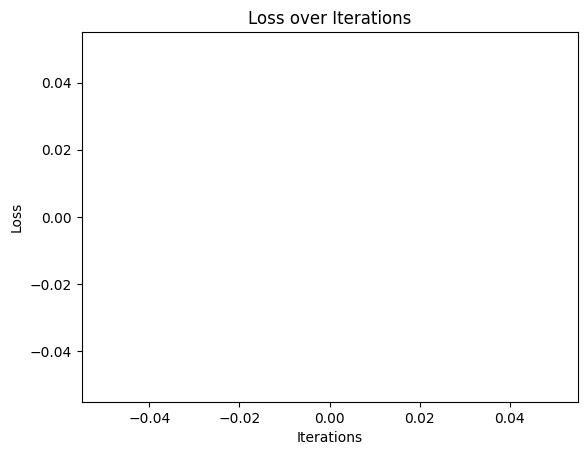

In [288]:
# Make predictions on the test set
acc = [0,0]
accu = 0
for i in range(50):
    np.random.seed(i)
    
    # Assuming X and Y are your features and target arrays
    n_samples = len(X)
    indices = np.arange(n_samples)
    
    # Shuffle the indices randomly
    np.random.shuffle(indices)
    
    # Split the dataset
    split_index = int(0.8 * n_samples)
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = Y[train_indices], Y[test_indices]

    model = LogitRegression(learning_rate=0.001, iterations=100000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = np.mean(predictions == y_test) * 100
    print(f'Accuracy: {accu:.2f}%',i)
    if accu<accuracy:
        accu = accuracy
    acc[0] = accu
    acc[1] = i
print(acc)
# Plotting the loss graph
plt.plot(range(len(model.loss)), model.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()


In [ ]:
penguins.head()